### Linear Regression

* 主要解决监督学习中的回归问题
* 是非线性模型的基础
* 结果具有很好的可解释性
* 蕴含机器学习中的很多重要思想

### 5-1 简单线性回归

本节学习的是单特征的简单线性回归\
典型的最小二乘法问题\
`y=ax+b`最小二乘法的推导

### 5-3 实现Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,2,3,4,5],dtype=float)
y = np.array([1,3,2,3,5],dtype=float)

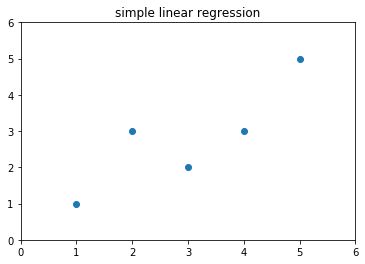

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6]) 
plt.title("simple linear regression")
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
list(zip(x,y))

[(1.0, 1.0), (2.0, 3.0), (3.0, 2.0), (4.0, 3.0), (5.0, 5.0)]

In [6]:
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num += (x_i -x_mean)*(y_i-y_mean)
    d += (x_i-x_mean)**2

In [7]:
a = num / d
b = y_mean - a * x_mean

In [8]:
y_hat = a * x + b
y_hat

array([1.2, 2. , 2.8, 3.6, 4.4])

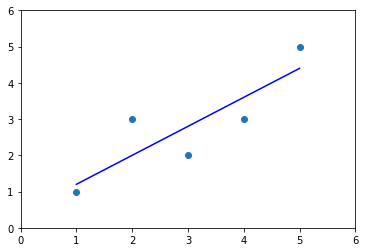

In [15]:
plt.scatter(x,y)
plt.plot(x,y_hat,'blue')
plt.axis([0,6,0,6])
plt.show()

In [25]:
x_predict = 6
y_predict =a * x_predict + b
y_predict

5.2

**封装简单线性回归算法**

* 注意，和kNN算法做对比，没有必要保存X_train,y_train数据，数据的存在是为了训练参数a和b
* 在具体预测时，只需要用到a和b即可

In [23]:
from playML.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x,y)

SimpleLinearRegression1()

In [33]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [34]:
# 查看属性
reg1.a_

0.8

In [35]:
reg1.b_

0.39999999999999947

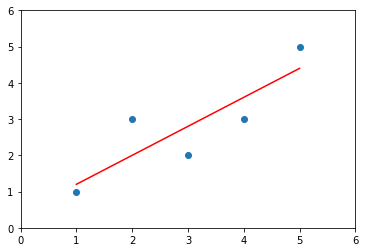

In [36]:
y_hat1 = reg1.predict(x)
plt.scatter(x,y)
plt.plot(x,y_hat1,color='r')
plt.axis([0,6,0,6])
plt.show()

### 5-4 向量化运算

In [37]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [38]:
reg2 = SimpleLinearRegression2()
reg2.fit(x,y)
reg2.predict(np.array([x_predict]))

array([5.2])

**向量化实现的性能测试** 

In [40]:
# 创造测试数据集
m = 1000000
big_x = np.random.random(size = m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [42]:
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

1.37 s ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.4 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 5-5 回归算法的评价

**同样的，将数据分为训练数据集和测试数据集**

* 均方误差MSE Mean Squared Error
* 均方根误差RMSE Root Mean Squared Error
* 平均绝对误差MAE Mean Absolute Error

波士顿房产数据 —— 引入多个特征

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [44]:
boston = datasets.load_boston()

In [45]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
# 只取房间数量这个特征
boston.data.shape
x = boston.data[:,5] # 只取第五列
x.shape

(506,)

In [48]:
y = boston.target
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [50]:
y.shape

(506,)

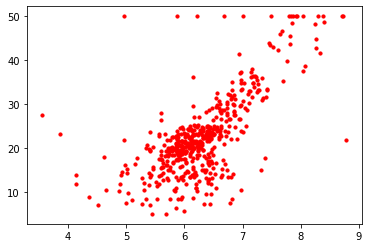

In [51]:
plt.scatter(x,y,c="red",s=10)
plt.show()

In [52]:
np.max(y)

50.0

In [53]:
(y<50.0)[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [55]:
# y最大的点同时在行上去除掉，是不正确的统计
x = x[y < 50.0]
y = y[y < 50.0] 

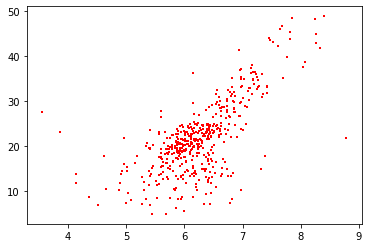

In [56]:
plt.scatter(x,y,c = "red",s=5,marker = '+')
plt.show()

使用简单线性回归法

In [57]:
from playML.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,seed=666)

In [58]:
x_train.shape

(392,)

In [59]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [60]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

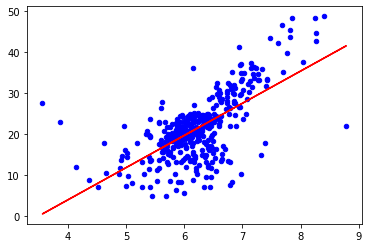

In [61]:
plt.scatter(x_train,y_train,c='blue',s =20)
plt.plot(x_train,reg.predict(x_train),c="red")
plt.show()

In [62]:
y_predict = reg.predict(x_test)

MSE

In [63]:
mse_test = np.sum((y_predict - y_test) **2)/len(y_test)
mse_test

24.156602134387438

RMSE

In [64]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

MAE

In [65]:
mae_test = np.sum(np.absolute(y_predict-y_test)) / len(y_test)
mae_test

3.5430974409463873

封装到函数里

In [66]:
from playML.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error


In [67]:
root_mean_squared_error(y_test,y_predict)

4.914936635846635

**scikit-learn中的MSE和MAE**

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
mean_absolute_error(y_test,y_predict)

3.5430974409463873

In [70]:
mean_squared_error(y_test,y_predict)

24.156602134387438

### 5-6 最好的衡量线性回归法的指标

R Squared r方

In [71]:
1 - mean_squared_error(y_test,y_predict) / np.var(y_test)

0.6129316803937322

**使用封装的函数**

In [73]:
from playML.metrics import r2_score

In [74]:
r2_score(y_test,y_predict)

0.6129316803937322

**sklearn中的R_Square**

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6129316803937324

在线性回归模块中封装R_square函数

In [76]:
reg.score(x_test,y_test)

0.6129316803937322

### 5-7 多元线性回归

将特征值写成m行n+1列的矩阵，参数θ写成m个元素的矩阵

多元线性回归的**正规方程**解，直接在互联网上查找，但是它的时间复杂度高

### 5-8 实现多元线性回归

In [77]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

In [79]:
boston = datasets.load_boston()

X=boston.data
y=boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [80]:
X.shape

(490, 13)

In [81]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,seed = 666)

In [91]:
from playML.LinearRegression import LinearRegression

reg = LinearRegression()
reg.fit_normal(X_train,y_train)

In [92]:
reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [94]:
reg.interception_

34.11739972320099

In [8]:
reg.score(X_test,y_test)

0.8129794056212774

### Scikit-Learn中的回归问题

In [96]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [97]:
lin_reg.fit(X_train,y_train) # 并非使用的是正规方程法

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
lin_reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [99]:
lin_reg.intercept_

34.1173997232298

**Knn Regressionor**（knn除了分类，也可以实现线性回归）

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train) # 一样的，传入训练数据
knn_reg.score(X_test,y_test)
KNeighborsRegressor?

**超参数搜索**

In [21]:
from sklearn.model_selection import GridSearchCV
# 由两个字典组成的数组构成网格参数
param_grid = [
    {
        "weights":["uniform"],  
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)],
    }
]

In [22]:
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [23]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [27]:
grid_search.best_score_ # 用CV交叉验证得到的分数

0.652216494152461

In [25]:
grid_search.best_estimator_ # 得到实例

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='distance')

**用我们的R2测量法测量**

In [26]:
grid_search.best_estimator_.score(X_test,y_test)

0.7160666820548708